In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from IPython.display import HTML, display, Image

import warnings
warnings.filterwarnings('ignore')

# Evaluation of probe sets

---
**NOTE NOTE NOTE NOTE**

This tutorial will be updated the next days.

**NOTE NOTE NOTE NOTE**

---

This tutorial shows how to to evaluate a probeset with the Spapros evaluation pipeline.
We examplary evaluate the probeset of 20 genes that was selected in our [basic selection tutoral](https://spapros.readthedocs.io/en/latest/tutorials/spapros_tutorial_basic_selection.html).


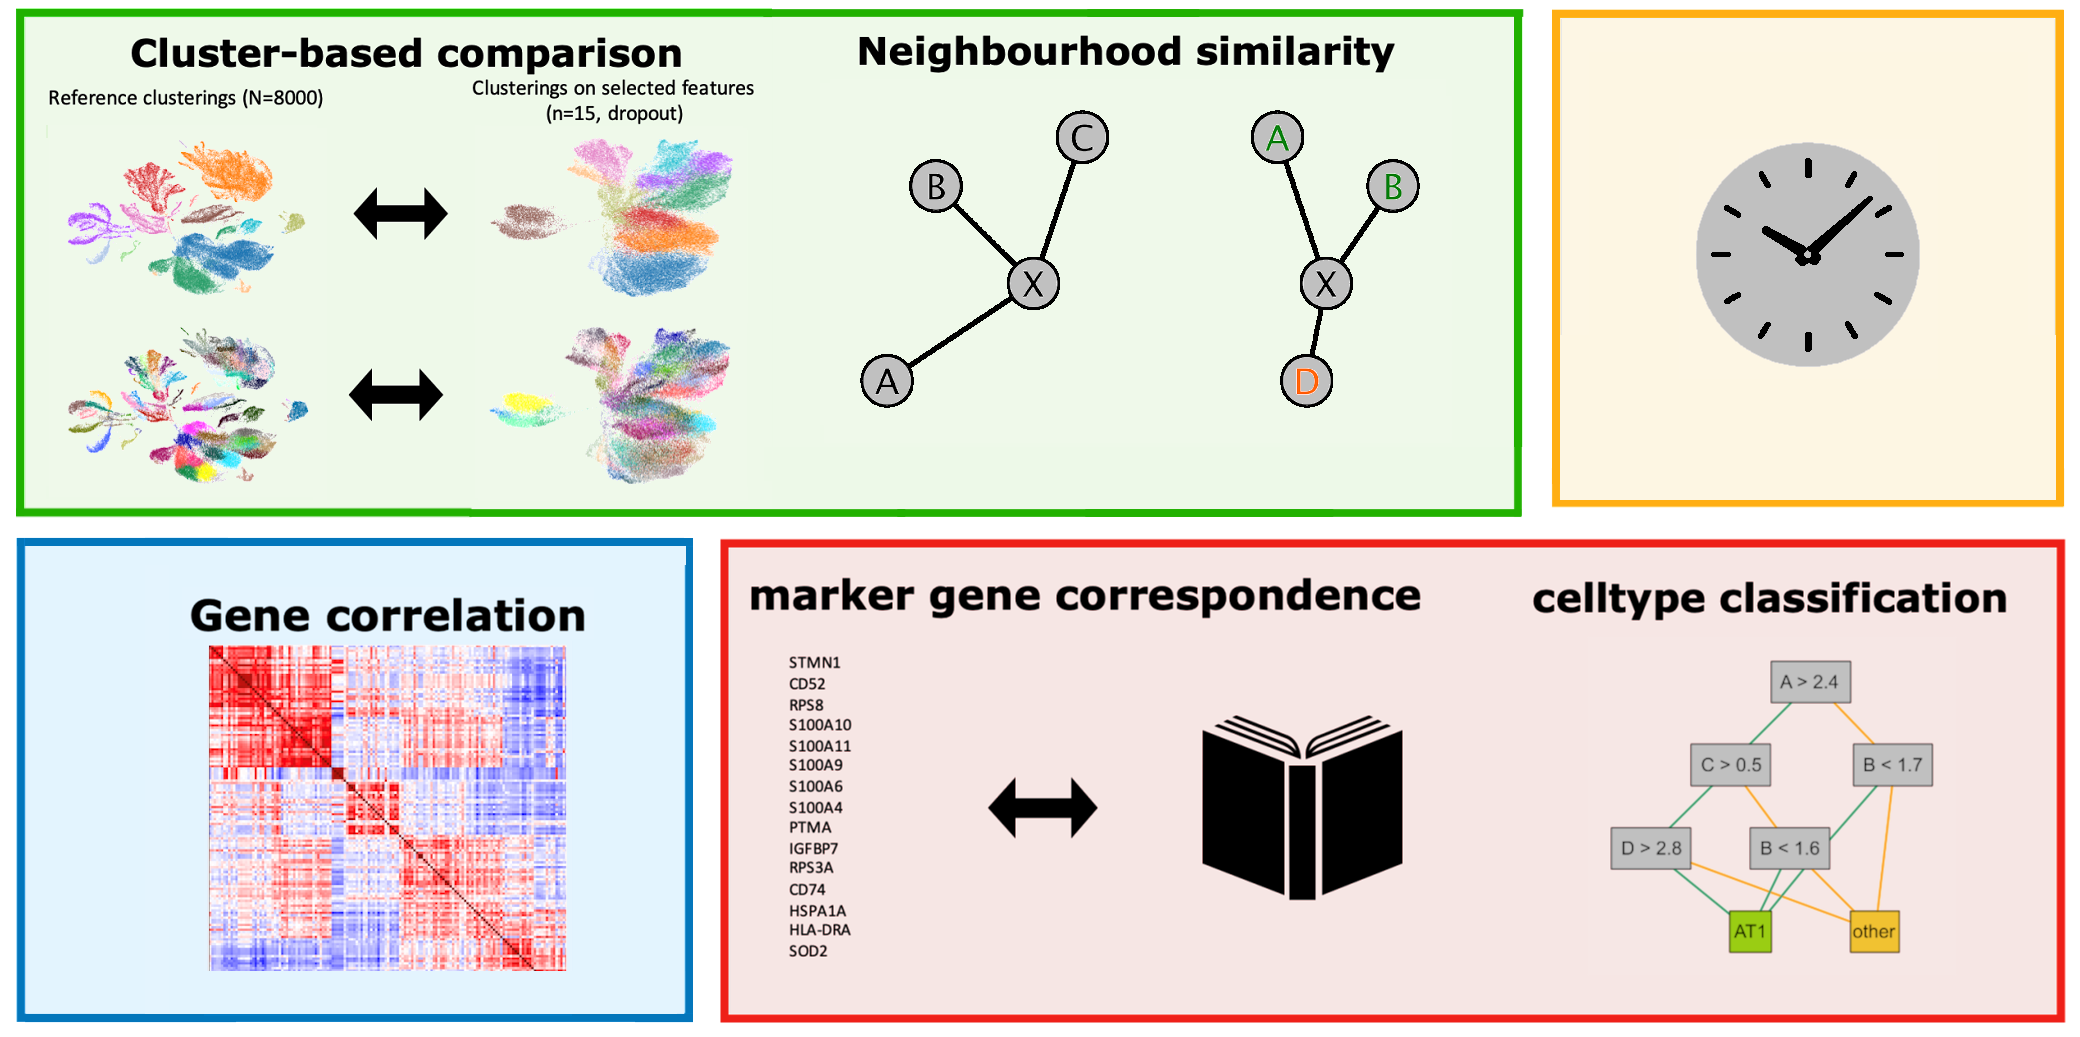

In [3]:
Image("../tutorials/abstract_figures/fig_01.png", width=700, embed=True)

The spapros probeset evaluation pipeline assesses four central qualities of a selected probeset. This figure visualizes these building blocks: 

- recovery of the variation in the data (green)
- differentiation of the cell types (red)
- representation of a minimal set of uncorrelated genes (blue)
- computation time (yellow)

## Import packages and setup

To run the notebook locally, create a conda environment using this [yaml file](../requirements_dev.yaml):

    conda create -f environment.yaml

In [4]:
import scanpy as sc
import spapros as sp

In [5]:
sc.settings.verbosity = 1
sc.logging.print_header()
print(f"spapros=={sp.__version__}")

scanpy==1.8.2 anndata==0.8.0 umap==0.5.2 numpy==1.21.5 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.6
spapros==0.1.0


## Load dataset

In [6]:
adata = sc.datasets.pbmc3k()
adata_tmp = sc.datasets.pbmc3k_processed()

# Get infos from the processed dataset
adata = adata[adata_tmp.obs_names, adata_tmp.var_names]
adata.obs['celltype'] = adata_tmp.obs['louvain']
adata.obsm['X_umap'] = adata_tmp.obsm['X_umap']
del adata_tmp

# Preprocess counts and get highly variable genes
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="cell_ranger", n_top_genes=1000)

adata

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'celltype'
    var: 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'X_umap'

## Get probesets

In [7]:
#probeset = ['PPBP', 'HLA-DQA1', 'FCGR3A', 'GZMB', 'CD79A', 'NKG7', 'S100A8', 'CD2',
#       'HLA-DPB1', 'GZMK', 'LST1', 'TYROBP', 'MS4A1', 'GPX1', 'CCL5',
#       'HLA-DRB1', 'GNLY', 'FCN1', 'SDPR', 'AIF1', 'FCER1G', 'IGJ', 'CST3',
#       'LGALS2', 'GZMA', 'PRF1', 'HIST1H2AC', 'FCER1A', 'STK17A', 'HLA-DQB1',
#       'CST7', 'SNRPB', 'LINC00926', 'HLA-DPA1', 'MS4A6A', 'UBE2L6', 'ATP6V1F',
#       'SF3B5', 'FYB', 'C9orf142', 'APOBEC3A', 'IGLL5', 'NPC2', 'GRN', 'LYAR',
#       'PYCARD', 'LGALS1', 'PF4', 'PTCRA', 'IFITM3']

# Probeset (selected with Spapros, see basic selection tutorial)
probeset = [
    'PF4', 'HLA-DPB1', 'FCGR3A', 'GZMB', 'CCL5', 'S100A8', 'IL32', 'HLA-DQA1', 'NKG7', 'AIF1', 'CD79A', 'LTB', 'TYROBP',
    'HLA-DMA', 'GZMK', 'HLA-DRB1', 'FCN1', 'S100A11', 'GNLY', 'GZMH'
]

# Reference probesets
reference_sets = sp.se.select_reference_probesets(adata, n=20)


Reference probeset selection.............................. ━━━━━━━━━━━━━━━━━━━━   0/4 0:00:00

## Evaluate sets

In [12]:
evaluator = sp.ev.ProbesetEvaluator(adata, verbosity=2, results_dir=None)

In [13]:
evaluator.evaluate_probeset(probeset, set_id="Spapros")

SPAPROS PROBESET EVALUATION:                                                                 
Shared metric computations................................ ━━━━━━━━━━━━━━━━━━━━   3/3 0:00:02
  Computing shared compuations for knn_overlap............ ━━━━━━━━━━━━━━━━━━━━   6/6 0:00:01
  Computing shared compuations for gene_corr.............. ━━━━━━━━━━━━━━━━━━━━  100% 0:00:00
Probeset specific pre computations........................ ━━━━━━━━━━━━━━━━━━━━   3/3 0:00:02
  Computing pre compuations for knn_overlap............... ━━━━━━━━━━━━━━━━━━━━   6/6 0:00:02
Final probeset specific computations...................... ━━━━━━╸━━━━━━━━━━━━━   1/3 0:00:04
  Computing final compuations for knn_overlap............. ━━━━━━━━━━━━━━━━━━━━   6/6 0:00:00
  Computing final compuations for forest_clfs............. ━━━━━━━━━━━━╸━━━━━━━ 16/25 0:00:03

In [14]:
for set_id, df in reference_sets.items():
    gene_set = df[df["selection"]].index.to_list()
    evaluator.evaluate_probeset(gene_set, set_id=set_id)


SPAPROS PROBESET EVALUATION:                                                                 
Shared metric computations................................ ━━━━━━━━━━━━━━━━━━━━   3/3 0:00:02
  Computing shared compuations for knn_overlap............ ━━━━━━━━━━━━━━━━━━━━   6/6 0:00:01
  Computing shared compuations for gene_corr.............. ━━━━━━━━━━━━━━━━━━━━  100% 0:00:00
Probeset specific pre computations........................ ━━━━━━━━━━━━━━━━━━━━   3/3 0:00:01
  Computing pre compuations for knn_overlap............... ━━━━━━━━━━━━━━━━━━━━   6/6 0:00:01
Final probeset specific computations...................... ━━━━━━━━━━━━━━━━━━━━   3/3 0:00:05
  Computing final compuations for knn_overlap............. ━━━━━━━━━━━━━━━━━━━━   6/6 0:00:00
  Computing final compuations for forest_clfs............. ━━━━━━━━━━━━━━━━━━━━ 25/25 0:00:05
  Computing final compuations for gene_corr............... ━━━━━━━━━━━━━━━━━━━━  100% 0:00:00
FINISHED

In [15]:
evaluator.summary_results#.index.tolist()


,knn_overlap mean_overlap_AUC,forest_clfs accuracy,forest_clfs perct acc > 0.8,gene_corr 1 - mean,gene_corr perct max < 0.8
Spapros,0.167580,0.924543,0.985218,0.772479,0.993647
PCA,0.293958,0.889088,0.902960,0.820372,1.000000
DE,0.160032,0.919459,0.953571,0.757868,0.792178
random (seed=0),0.023879,0.575304,0.000000,0.976067,1.000000
HVG,0.056358,0.818277,0.729101,0.840755,0.900000


## Visualize the results

In [9]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 60

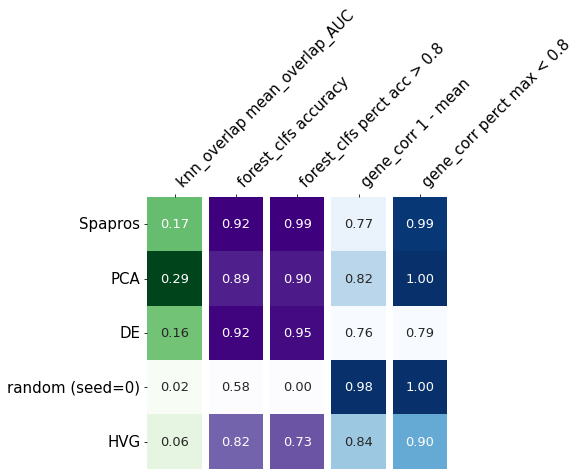

In [16]:
evaluator.plot_summary()

**TODO**:
describe each metric! (we're refering to this tutorial for getting descriptions of the metrics). Probably best to do this after the summary plot

## What's next?

You learned so far the very basic spapros evaluation probeset pipeline.
There are several ways to customize and improve your evaluation with spapros.
See our [advanced evaluation tutorial](https://spapros.readthedocs.io/en/latest/tutorials/spapros_tutorial_advanced_evaluation.html) if you want to learn more.
We also explain each available metric there (there are even more than shown here!) and show how to create pretty plots.

**Note**:
After running the spapros evaluation pipeline, the results are stored in a directory, that is by default called `probeset_evaluation`.
If you run another evaluation after this tutorial, be careful that you either specify another dir or delete the previously created results directory because otherwise parts will be overwritten and parts will be falsely reused!
If you do not want to save results, initialize the `ProbesetEvaluator` with `dir=None`, like in this tutorial.